<a href="https://colab.research.google.com/github/omar-inamdar/PRODIGY_DS_02/blob/main/PRODIGY_DS_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING THE LIBRARIES

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

READING THE DATASET

In [ ]:
data =pd.read_csv("train.csv")
data.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


CHECKING DATA INFO

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


CLEANING THE DATASET(REPLACING THE NAN VALUES)

In [ ]:

print(data.isnull().sum())

data['Age'].fillna(data['Age'].median(),inplace=True)  #replacing using median

data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True) #replacing using mode

data['Cabin'].fillna(data['Cabin'].mode()[0],inplace=True) #replacing using mode

data.drop(['Name','Ticket',], axis=1,inplace=True) #dropping the unnecessary data

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
print(data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Embarked       0
dtype: int64


PLOTTING THE GRAPH FOR SURVIVED PEOPLE

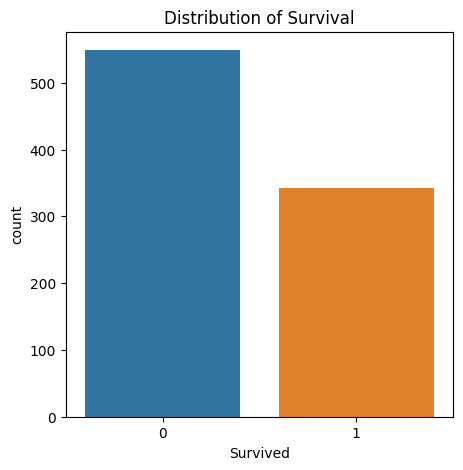

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x='Survived',data=data)
plt.title('Distribution of Survival')
plt.show()

PLOTTONG THE GRAPH FOR SURVIVED BASED ON THE GENDER

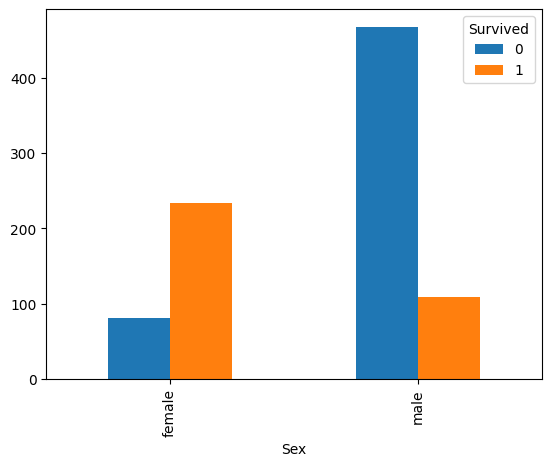

In [ ]:
counts=data.groupby(['Sex','Survived']).size().unstack()
counts.plot(kind="bar")
plt.show()


GROUPING THE DATA BASED ON THE CLASS(COACH) OF THE TRAIN

In [ ]:

data['PclassGroup'] = pd.cut(data['Pclass'], bins=[0,1,2,3], labels=['Fisrt class', 'Second class', 'Third class'])
survival_by_Pclassgroup = data.groupby('PclassGroup')['Survived'].mean()
print(survival_by_Pclassgroup)

PclassGroup
Fisrt class     0.629630
Second class    0.472826
Third class     0.242363
Name: Survived, dtype: float64


PLOTTING THE GRAPH USING THE GROUPS CREATED IN PCLASS

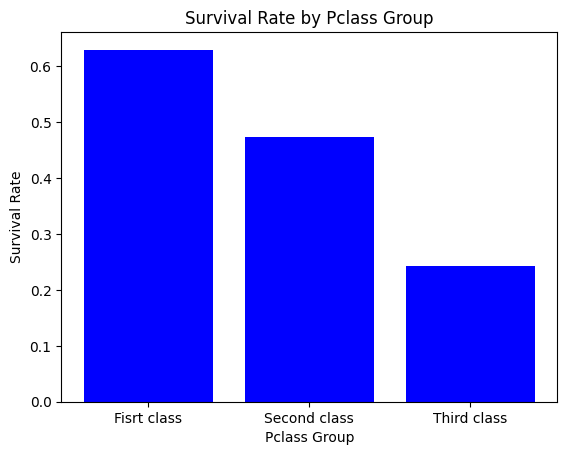

In [ ]:
plt.bar(survival_by_Pclassgroup.index, survival_by_Pclassgroup.values,color="blue")
plt.xlabel('Pclass Group')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Pclass Group')
plt.show()


END